# Load data 

In [5]:
# Team 3 Part 1 Python CODE to Load, Add Missing Vallues, Sort Outliers & Slice the code 

import pandas as pd             # data science essentials
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns           # more data visualization

## Loading the data 
wdiw_file ='WDIW_FDataset.xlsx'
wdiw_data = pd.read_excel('WDIW_FDataset.xlsx') #index_col=0)

wdiw_ESA = wdiw_data[wdiw_data['Hult Region']=='East/South Africa']

wdiw_oli = wdiw_ESA[['Country Code','Country Name','Hult Region','Access to electricity (% of population)', 
                      'Access to electricity, rural (% of rural population)','Access to electricity, urban (% of urban population)', 
                     'Mobile cellular subscriptions (per 100 people)', 'GDP growth (annual %)', 'GDP (current US$)',
                      'Life expectancy at birth, total (years)','Population, total']]

wdiw_oli_world = wdiw_data[['Country Code','Country Name','Hult Region','Access to electricity (% of population)', 
                      'Access to electricity, rural (% of rural population)','Access to electricity, urban (% of urban population)', 
                     'Mobile cellular subscriptions (per 100 people)', 'GDP growth (annual %)', 'GDP (current US$)',
                      'Life expectancy at birth, total (years)','Population, total']]

wdiw_oli.describe().round(4)

,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Mobile cellular subscriptions (per 100 people),GDP growth (annual %),GDP (current US$),"Life expectancy at birth, total (years)","Population, total"
count,21.0000,20.0000,21.0000,21.0000,21.0000,2.100000e+01,21.0000,2.000000e+01
mean,42.4475,24.9696,74.2736,73.1922,2.7550,3.471420e+10,62.7079,2.373075e+07
std,20.2626,19.0987,13.7492,38.2062,3.4520,7.592350e+10,4.0239,2.657785e+07
min,9.3000,1.6584,42.1207,20.3640,-5.2000,3.060000e+02,52.9470,9.440970e+05
25%,27.4255,13.3556,65.3383,41.4517,1.4145,3.172416e+09,60.8120,4.433677e+06
50%,40.3000,22.4953,75.2000,73.0948,3.7370,1.146585e+10,63.2790,1.441293e+07
75%,60.2000,29.5147,84.8000,98.9298,4.7040,2.586814e+10,65.8720,3.177737e+07
max,84.4000,67.3912,96.6000,155.2324,9.5039,3.492681e+11,68.8120,1.064000e+08


# Adding Local Missing Values + Add Angola + Remove Togo

In [ ]:
## Oli Missing Values to add
# Madagascar 'Access to electricity, rural (% of rural population)' aprox = 15.00, Souce = World Bank Article 2019
# Somalia'GDP (current US$)' = 4721000393, Souce = World Bank 2018
# Eritrea 'Population, total' = 3513214 , Souce = UN 2019

## Missing Values Explanations
# No data'GDP growth (annual %)' for Eritrea (2011), Party Dictatorship ie it is not a Democracy 
# No data'GDP growth (annual %)' for Somalia (1990), Civil War since 1991
# No data'GDP growth (annual %)' for South Sudan (2016) Civil war since 2013
# No data'GDP (current US$)' for South Sudan (2016), GDP fell by 400% in 15-16, Civil war since 2013
# No data'GDP (current US$)' for Eritrea (2011), Party Dictatorship ie it is not a Democracy 
# No data'GDP (current US$)' for Eritrea (2011), Party Dictatorship ie it is not a Democracy 

# Dealing with population Missing Values

In [8]:
## Drop countries missing most data

num_col = len(wdiw_oli_world.columns)
print("Total num colums: {}".format(num_col))
print("Columns per country:")
for i, row in wdiw_oli_world.iterrows():
    num_col_country = wdiw_oli_world.loc[i].count()
    print(i, num_col_country)
    # If country is missing more than half of the data, drop it
    if num_col_country < (num_col / 2):
        print("**Dropping {}**".format(i))
        wdiw_oli_world = wdiw_oli_world.drop(i)
        
#Imputes means for remaining missing data

    count_nan = len(wdiw_oli_world[col]) - wdiw_oli_world[col].count()
    if count_nan > 0:
        # If more than 1/2 the columns values are NAN, toss the column
        if count_nan > (len(wdiw_oli_world[col]) / 2):
            print('{} had {} missing values.'.format(col, count_nan))
            print('Dropping "{}". Too many missing values.'.format(col))
            wdiw_oli_world = wdiw_oli_world.drop([col], axis=1)
wdiw_oli_world = wdiw_oli_world.fillna(wdiw_oli_world.mean())



Total num colums: 11
Columns per country:
0 11
1 11
2 11
3 6
4 10
5 10
6 11
7 11
8 11
9 10
10 11
11 11
12 11
13 11
14 11
15 11
16 11
17 11
18 11
19 11
20 11
21 9
22 11
23 11
24 11
25 11
26 11
27 8
28 11
29 11
30 11
31 11
32 11
33 11
34 11
35 11
36 10
37 11
38 11
39 11
40 11
41 11
42 11
43 10
44 11
45 11
46 11
47 11
48 11
49 11
50 11
51 11
52 11
53 11
54 10
55 11
56 11
57 11
58 11
59 11
60 11
61 10
62 11
63 11
64 11
65 9
66 11
67 11
68 11
69 9
70 11
71 11
72 11
73 11
74 11
75 8
76 11
77 9
78 11
79 10
80 11
81 11
82 11
83 11
84 11
85 11
86 11
87 11
88 11
89 11
90 11
91 11
92 11
93 11
94 7
95 11
96 11
97 11
98 11
99 11
100 11
101 11
102 11
103 9
104 11
105 10
106 11
107 11
108 11
109 11
110 11
111 11
112 11
113 11
114 9
115 11
116 11
117 11
118 11
119 10
120 11
121 11
122 11
123 11
124 11
125 10
126 10
127 11
128 11
129 11
130 11
131 10
132 11
133 11
134 11
135 11
136 11
137 9
138 11
139 9
140 11
141 11
142 8
143 11
144 11
145 11
146 11
147 11
148 11
149 11
150 9
151 11
152 11
153 11
154 

# Outliers 

# Data Visualization

Country Code


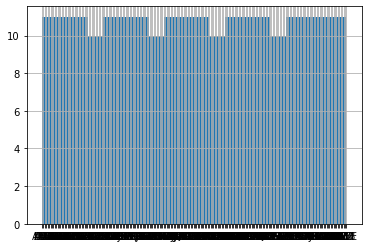

Country Name


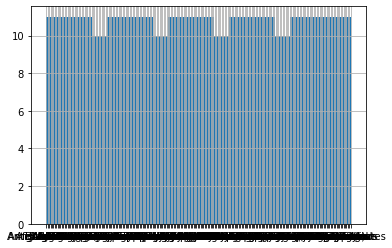

Hult Region


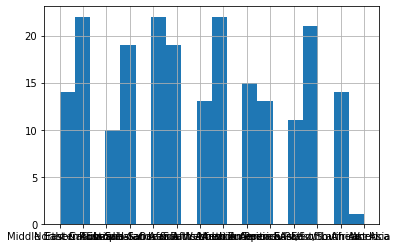

Access to electricity (% of population)


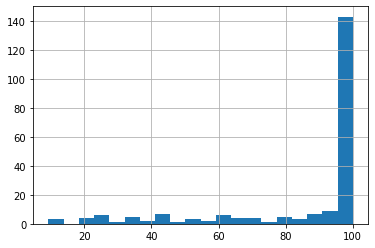

Access to electricity, rural (% of rural population)


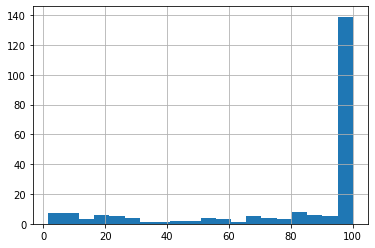

Access to electricity, urban (% of urban population)


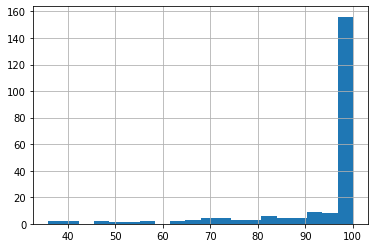

Mobile cellular subscriptions (per 100 people)


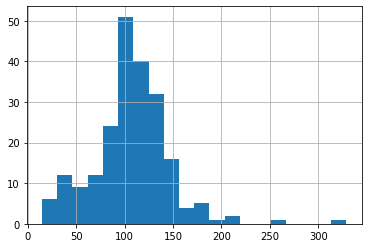

GDP growth (annual %)


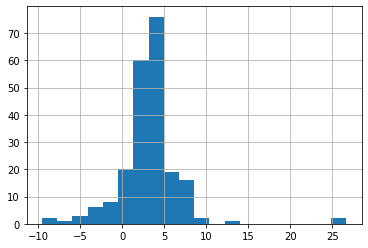

GDP (current US$)


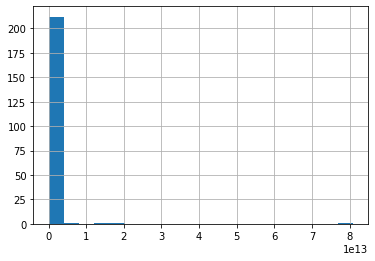

Life expectancy at birth, total (years)


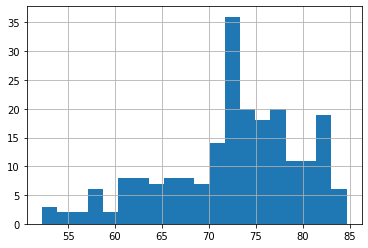

Population, total


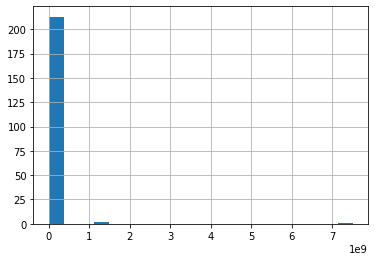

In [9]:
for col in wdiw_oli_world:
    wdiw_oli_world[col].hist(bins=20)
    print(col)
    plt.show()
    
    
###### Oli Electricity E/A Af & World Analysis TODO

#Append GDP Per Capital Calculation for World Data Set
#Append GDP Per Capital Calculation for Just S/E Africa

#Remove Line from Oli World Data Set that have Missing values 
#print(wdiw_oli_world.isnull().sum())

###- Electricity % vs Mobile Cellular, GDP Growth, GDP, Life Expectancy & GDP/Capita
## GDP Current, GDP per Capital Remove: South Sudan & Eritrea
## GDP Growth Remove: South Sudan, Somalia & Eritrea

#1. Run Distribution Plots

#2. Correlations, 